In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 假设数据集文件名为 dataset.csv
aug_data = pd.read_csv('E:\\AI\\MedicalChat\\datasets\\raw_and_generate_dataset\\train_data_old.csv')
raw_data = pd.read_csv('E:\\AI\\MedicalChat\\datasets\\raw_dataset\\train_data_old.csv')

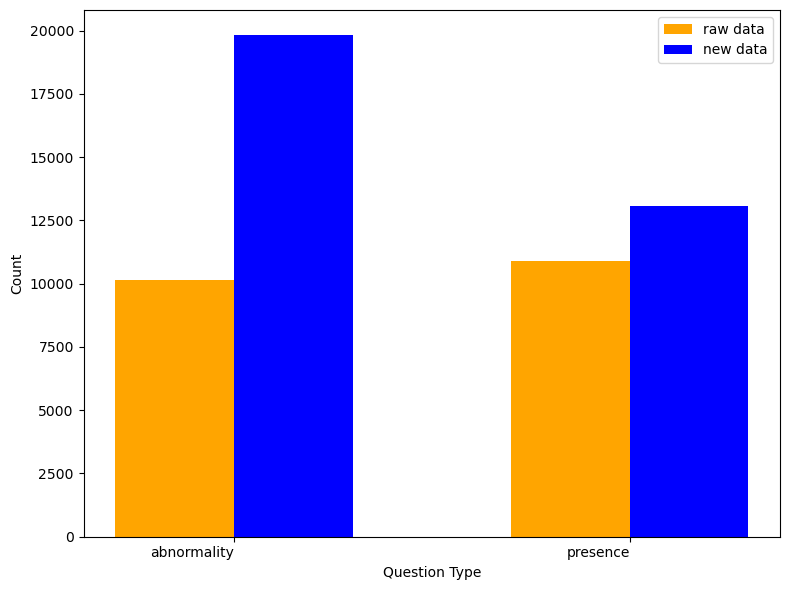

In [14]:
# 假设你已经加载了数据到aug_data和raw_data中

# 过滤掉不需要的question_type
filtered_question_types = ['level', 'location', 'type', 'view']
aug_data_filtered = aug_data[~aug_data['question_type'].isin(filtered_question_types)]
raw_data_filtered = raw_data[~raw_data['question_type'].isin(filtered_question_types)]

# 计算aug_data中每个question_type的数据量
aug_data_counts = aug_data_filtered['question_type'].value_counts()

# 计算raw_data中每个question_type的数据量
raw_data_counts = raw_data_filtered['question_type'].value_counts()

# 获取所有的question_type
all_question_types = sorted(set(raw_data_filtered['question_type'].unique()) | set(aug_data_filtered['question_type'].unique()))

# 创建一个数组，用于绘制x轴位置
x = np.arange(len(all_question_types))

# 设置图形大小
plt.figure(figsize=(8, 6))

# 绘制raw_data的柱状图
plt.bar(x-0.15, [raw_data_counts.get(q_type, 0) for q_type in all_question_types], width=0.3, color='orange', label='raw data')
# for i, count in enumerate([raw_data_counts.get(q_type, 0) for q_type in all_question_types]):
#     plt.text(i - 0.2, count + 0.1, str(count), ha='center')

# 绘制aug_data的柱状图
plt.bar(x+0.15 , [aug_data_counts.get(q_type, 0) for q_type in all_question_types], width=0.3, color='blue', label='new data')
# for i, count in enumerate([aug_data_counts.get(q_type, 0) for q_type in all_question_types]):
#     plt.text(i + 0.2, count + 0.1, str(count), ha='center')

# 设置x轴标签和标题
plt.xlabel('Question Type')
plt.ylabel('Count')
plt.xticks(x, all_question_types, rotation=0, ha='right')

# 添加图例
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()


In [6]:

# 创建一个空的DataFrame，用于存储最终的数据
def process_data(input_data):
    final_data = pd.DataFrame()
    change_count = 0
    for index, row in input_data.iterrows():
        question_type = row['question_type']
        question = row['question']

        if question_type == 'abnormality':
            if question == 'is there evidence of any abnormalities in this image?':
                row['question'] = 'Is there nothing unusual about this image?'
                row['answer'] = 'yes' if row['answer'] == 'no' else 'no'
                change_count += 1

            elif question == 'what abnormalities are seen in this image?':
                answers = row['answer'].split(',')
                if 'atelectasis' not in answers:
                    row['question'] = 'According to this image, is it atelectasis? Are there any other abnormalities?'
                    row['answer'] = 'Not atelectasis, but {}'.format(row['answer'])
                    change_count += 1
                elif 'atelectasis' in answers:
                    row['question'] = 'According to this image, is it pleural effusion?'
                    row['answer'] = 'no, it’s atelectasis'
                    change_count += 1

        elif question_type == 'presence':
            if question == 'is there evidence of pleural effusion in this image?':
                row['question'] = 'Is there no evidence of pleural effusion in this image?'
                row['answer'] = 'yes' if row['answer'] == 'no' else 'no'
                change_count += 1

            elif question == 'is there pleural effusion?':
                row['question'] = 'Is there no pleural effusion?'
                row['answer'] = 'yes' if row['answer'] == 'no' else 'no'
                change_count += 1

            elif question == 'is there pneumothorax?':
                row['question'] = 'Is there no pneumothorax?'
                row['answer'] = 'yes' if row['answer'] == 'no' else 'no'
                change_count += 1

        elif question_type == 'level':
            words = row['question'].split()
            words = words[4]
            row['question'] = 'Is {} serious?'.format(words)
            row['answer'] = 'yes' if row['answer'] == 'severe' else 'no, but {}'.format(row['answer'])
            change_count += 1

        # final_data = final_data.append(row, ignore_index=True)
        final_data = pd.concat([final_data, row.to_frame().T], ignore_index=True)
        
    print(f'一共生成了{change_count}行')
    
    return final_data

def text_data(input_data):
    text_data = pd.DataFrame()
    count = 0
    for index, row in input_data.iterrows():
        question_type = row['question_type']
        question = row['question']
        types = ['abnormality','presence','level']
        questions = ['is there evidence of any abnormalities in this image?',\
                     'what abnormalities are seen in this image?',\
                     'is there evidence of pleural effusion in this image?',\
                     'is there pleural effusion?',\
                     'is there pneumothorax?']
        
        if question_type in types:
            if question in questions:
                text_data = pd.concat([text_data, row.to_frame().T], ignore_index=True)
                count += 1
                
    print(f'一共有{count}个测试')
    return text_data

# 使用示例
# text_data = text_data(data)



# 将最终的数据保存到 merged_mimic_more.csv 文件
# final_data.to_csv('merged_mimic_more.csv', index=False)


一共有16869个测试


In [7]:
# output_data = process_data(text_data)
# output_data.to_csv('../data/medical-aug-vqa/generate_data_16869_rows.csv', index=False)

一共生成了{change_count}行


In [8]:
len(output_data)

16869

In [ ]:
raw_data = pd.read_csv('../data/medical-aug-vqa/raw_data_70070_rows.csv')
generate_data = pd.read_csv('../data/medical-aug-vqa/raw_data_70070_rows_generate.csv')

In [ ]:
# 合并数据框，并添加is_generate字段
merged_data = pd.merge(raw_data, generate_data, how='outer', indicator=True)

# 为is_generate字段赋值
merged_data['is_generate'] = 0
merged_data.loc[merged_data['_merge'] == 'right_only', 'is_generate'] = 1

# 删除不需要的_merge字段
merged_data = merged_data.drop('_merge', axis=1)

merged_data.to_csv('../data/medical-aug-vqa/row_data_and_generate_data_86939_rows.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86939 entries, 0 to 86938
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   study_id       86939 non-null  int64 
 1   subject_id     86939 non-null  int64 
 2   question_type  86939 non-null  object
 3   question       86939 non-null  object
 4   answer         86939 non-null  object
 5   dicom_id       86939 non-null  object
 6   is_generate    86939 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 4.6+ MB